# FIFA 19 PLAYER RATINGS PREDICTOR

## CREATING A MODEL THAT CORRECTLY PREDICTS FIFA 19 PLAYERS' RATINGS

## DATA COLLECTION

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [2]:
df_data_1.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## DATA CLEANING

In [3]:
df_fifa = df_data_1[['Name','Age', 'Overall', 'Potential', 'Value', 'Release Clause']]

In [4]:
df_fifa.head()

,Name,Age,Overall,Potential,Value,Release Clause
0,L. Messi,31,94,94,€110.5M,€226.5M
1,Cristiano Ronaldo,33,94,94,€77M,€127.1M
2,Neymar Jr,26,92,93,€118.5M,€228.1M
3,De Gea,27,91,93,€72M,€138.6M
4,K. De Bruyne,27,91,92,€102M,€196.4M


In [5]:
df_fifa.corr()

,Age,Overall,Potential
Age,1.000000,0.452350,-0.253312
Overall,0.452350,1.000000,0.660939
Potential,-0.253312,0.660939,1.000000


In [6]:
## convertig the value column to numeric
df_fifa['Value'] = [x[1:-1] for x in df_fifa['Value']]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
## converting the release clause column to numeric
df_fifa['Release Clause'] = df_fifa['Release Clause'].map(lambda x: str(x)[1:-1])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
df_fifa.head()

,Name,Age,Overall,Potential,Value,Release Clause
0,L. Messi,31,94,94,110.5,226.5
1,Cristiano Ronaldo,33,94,94,77,127.1
2,Neymar Jr,26,92,93,118.5,228.1
3,De Gea,27,91,93,72,138.6
4,K. De Bruyne,27,91,92,102,196.4


In [9]:
df_fifa[['Age', 'Overall', 'Potential', 'Value', 'Release Clause']] = df_fifa[['Age', 'Overall', 'Potential', 'Value', 'Release Clause']].convert_objects(convert_numeric = True)
df_fifa.corr()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Age,Overall,Potential,Value,Release Clause
Age,1.000000,0.452350,-0.253312,-0.044111,-0.041166
Overall,0.452350,1.000000,0.660939,-0.234541,-0.392288
Potential,-0.253312,0.660939,1.000000,-0.236335,-0.385456
Value,-0.044111,-0.234541,-0.236335,1.000000,0.280187
Release Clause,-0.041166,-0.392288,-0.385456,0.280187,1.000000


In [10]:
## resetting the index
df_fifa = df_fifa.dropna().reset_index(drop = True)
df_fifa.describe()

,Age,Overall,Potential,Value,Release Clause
count,16643.000000,16643.000000,16643.000000,16643.000000,16643.000000
mean,25.226221,66.162771,71.140900,268.732620,228.201274
std,4.716588,7.008236,6.151409,287.580369,299.251866
min,16.000000,46.000000,48.000000,1.000000,1.000000
25%,21.000000,62.000000,67.000000,5.000000,2.500000
50%,25.000000,66.000000,71.000000,170.000000,19.800000
75%,29.000000,71.000000,75.000000,475.000000,431.000000
max,45.000000,94.000000,95.000000,975.000000,999.000000


In [11]:
df_fifa.head()

,Name,Age,Overall,Potential,Value,Release Clause
0,L. Messi,31,94,94,110.5,226.5
1,Cristiano Ronaldo,33,94,94,77.0,127.1
2,Neymar Jr,26,92,93,118.5,228.1
3,De Gea,27,91,93,72.0,138.6
4,K. De Bruyne,27,91,92,102.0,196.4


## DATA EXPLORATION

In [12]:
## correlation coefficients
df_fifa.corr()

,Age,Overall,Potential,Value,Release Clause
Age,1.000000,0.464977,-0.236762,-0.040465,-0.041166
Overall,0.464977,1.000000,0.663346,-0.222161,-0.392288
Potential,-0.236762,0.663346,1.000000,-0.230880,-0.385456
Value,-0.040465,-0.222161,-0.230880,1.000000,0.280187
Release Clause,-0.041166,-0.392288,-0.385456,0.280187,1.000000


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [14]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

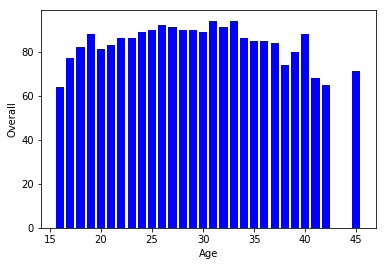

In [15]:
plt.bar('Age', 'Overall', data = df_fifa, color = 'blue')
plt.xlabel("Age")
plt.ylabel("Overall")
plt.show()

In [16]:
line1 = linear_model.LinearRegression() 

In [17]:
df_Potential = df_fifa.loc[:, "Potential"].values.reshape(-1, 1) 
df_Overall = df_fifa.loc[:, "Overall"].values.reshape(-1, 1) 

In [18]:
line1.fit(df_Potential, df_Overall) 
pred1 = line1.predict(df_Potential)

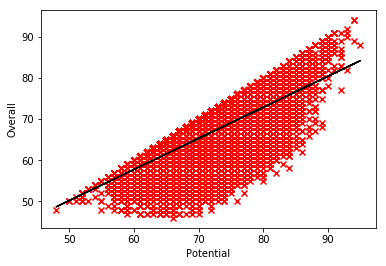

In [19]:
plt.scatter('Potential', 'Overall', data = df_fifa, marker = 'x', color = 'red')
plt.xlabel("Potential")
plt.ylabel("Overall")
plt.plot(df_Potential,pred1, color='black')
plt.show()

## MODELLING

In [20]:
import numpy as np
split = np.random.rand(len(df_fifa)) < 0.75
train = df_fifa[split]
test = df_fifa[~split]

In [21]:
regr = linear_model.LinearRegression()

In [22]:
## Trainig & fitting the model
fifa_x_train = train[['Age','Value','Potential','Release Clause']]
fifa_y_train = train[['Overall']]
poly = PolynomialFeatures(degree=4)
fifa_x_train_poly = poly.fit_transform(fifa_x_train)
regr.fit(fifa_x_train_poly, fifa_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
## Testing the model
fifa_x_test = test[['Age','Value','Potential','Release Clause']]
fifa_y_test = test[['Overall']]
fifa_x_test_poly = poly.fit_transform(fifa_x_test)

In [24]:
df_fifa_pred = regr.predict(fifa_x_test_poly)

In [25]:
r2_score(fifa_y_test, df_fifa_pred)

0.9760120568981642

In [26]:
fifa_x_test['Predicted Ratings'] = df_fifa_pred

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
df_fifa1 = pd.merge(df_fifa,fifa_x_test)
df_fifa1.head(20)

,Name,Age,Overall,Potential,Value,Release Clause,Predicted Ratings
0,L. Suárez,31,91,91,80.0,164.0,92.622924
1,Sergio Ramos,32,91,91,51.0,104.6,90.636491
2,J. Oblak,25,90,93,68.0,144.5,89.318113
3,David Silva,32,90,90,60.0,111.0,90.941416
4,S. Agüero,30,89,89,64.5,119.3,89.930264
5,G. Chiellini,33,89,89,27.0,44.6,86.735352
6,M. Salah,26,88,89,69.5,137.3,87.849940
7,K. Navas,31,87,87,30.5,62.5,86.636084
8,C. Immobile,28,87,87,52.0,88.4,86.429762
9,D. Mertens,31,87,87,45.0,76.5,87.332146


In [28]:
df_fifa_pred2 = regr.predict(fifa_x_train_poly)

In [29]:
fifa_x_train['Predicted Ratings'] = df_fifa_pred2

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
df_fifa2 = pd.merge(df_fifa,fifa_x_train)
df_fifa2.head(20)

,Name,Age,Overall,Potential,Value,Release Clause,Predicted Ratings
0,L. Messi,31,94,94,110.5,226.5,93.847218
1,Cristiano Ronaldo,33,94,94,77.0,127.1,92.965215
2,Neymar Jr,26,92,93,118.5,228.1,91.715503
3,De Gea,27,91,93,72.0,138.6,90.330686
4,K. De Bruyne,27,91,92,102.0,196.4,91.642929
5,E. Hazard,27,91,91,93.0,172.1,90.852480
6,L. Modrić,32,91,91,67.0,137.4,92.250086
7,R. Lewandowski,29,90,90,77.0,127.1,90.375805
8,T. Kroos,28,90,90,76.5,156.8,90.347436
9,D. Godín,32,90,90,44.0,90.2,89.663705
